In [1]:
import numpy as np
import pandas as pd
import tushare as ts

pro = ts.pro_api('36edcbf4f0f39791466df6aa78b8602b50985638532710659cc35754')

In [15]:
YGS = pro.daily(ts_code='000429.SZ', start_date='20170101')
NHGS = pro.daily(ts_code='600377.SH', start_date='20170101')

NHGS.head(10)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600377.SH,20190718,10.08,10.15,9.99,10.04,10.09,-0.05,-0.4955,93926.76,94530.459
1,600377.SH,20190717,10.24,10.24,10.05,10.09,10.19,-0.10,-0.9814,71845.17,72628.433
2,600377.SH,20190716,10.35,10.36,10.15,10.19,10.33,-0.14,-1.3553,95944.08,97878.831
3,600377.SH,20190715,10.37,10.42,10.22,10.33,10.35,-0.02,-0.1932,70735.07,72902.813
4,600377.SH,20190712,10.47,10.47,10.31,10.35,10.47,-0.12,-1.1461,60625.09,62905.845
5,600377.SH,20190711,11.02,11.05,10.88,10.93,11.01,-0.08,-0.7266,72218.18,78942.328
6,600377.SH,20190710,10.96,11.03,10.84,11.01,10.92,0.09,0.8242,47274.81,51825.413
7,600377.SH,20190709,11.04,11.10,10.88,10.92,11.13,-0.21,-1.8868,69879.80,76473.327
8,600377.SH,20190708,11.04,11.15,10.90,11.13,11.04,0.09,0.8152,68337.60,75360.047
9,600377.SH,20190705,10.97,11.08,10.94,11.04,11.03,0.01,0.0907,41299.24,45450.744


In [17]:
# 利用percen_change计算𝝈
def cal_downside_risk(r):
    _r = r.map(lambda x: x / 100)
    mean = _r.mean()
    r_adjust = _r.map(lambda x: min(x-mean, 0))
    risk = np.sqrt((r_adjust ** 2).mean())
    return risk

YGS_risk = cal_downside_risk(YGS.pct_chg)
NHGS_risk = cal_downside_risk(NHGS.pct_chg)

print('粤高速下行风险：', YGS_risk)
print('宁沪高速下行风险：', NHGS_risk)

粤高速下行风险： 0.010609074794056917
宁沪高速下行风险： 0.006732603242142397


In [22]:
# 历史模拟法

# pandas Series对象的quantile()方法会返回分位数
YGS_var = YGS.pct_chg.quantile(0.05) / 100
NHGS_var = NHGS.pct_chg.quantile(0.05) / 100
print('粤高速VaR(0.05,1天)：', YGS_var)
print('宁沪高速VaR(0.05,1天)：', NHGS_var)

粤高速VaR(0.05,1天)： -0.0237002
宁沪高速VaR(0.05,1天)： -0.01481


In [23]:
# 协方差矩阵法
# scipy.stats.norm函数可以根据我们输入的置信区间、均值和标准差来求得对应的分位数
from scipy.stats import norm

YGS_var = norm.ppf(0.05, YGS.pct_chg.mean(), 
                     YGS.pct_chg.std()) / 100
NHGS_var = norm.ppf(0.05, NHGS.pct_chg.mean(), 
                      NHGS.pct_chg.std()) / 100
print('粤高速VaR(0.05,1天)：', YGS_var)
print('宁沪高速VaR(0.05,1天)：', NHGS_var)

粤高速VaR(0.05,1天)： -0.02486341564328183
宁沪高速VaR(0.05,1天)： -0.015473244235848211


In [20]:
VaR_NHGS = NHGS.pct_chg.quantile(0.05)
ES_NHGS = NHGS.query('pct_chg <= @VaR_NHGS')['pct_chg'].mean()

print('宁沪近两年在险价值：', VaR_wanke)
print('宁沪近两年期望亏空：', ES_wanke)

宁沪近两年在险价值： -3.635
宁沪近两年期望亏空： -4.953064516129033


In [9]:
import pandas as pd
import tushare as ts

index_sh = pro.index_daily(ts_code='000001.SH', start_date='20180101')
index_sh.index = pd.to_datetime(index_sh.trade_date)
index_sh = index_sh.sort_index(ascending=True)
index_sh.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2018-01-02,000001.SH,20180102,3348.3259,3314.0307,3349.0530,3314.0307,3307.1721,41.1538,1.2444,202278860.0,227788461.1
2018-01-03,000001.SH,20180103,3369.1084,3347.7428,3379.9152,3345.2887,3348.3259,20.7825,0.6207,213836149.0,258366523.2
2018-01-04,000001.SH,20180104,3385.7102,3371.0000,3392.8264,3365.2954,3369.1084,16.6018,0.4928,206955288.0,243090768.7
2018-01-05,000001.SH,20180105,3391.7501,3386.4640,3402.0694,3380.2450,3385.7102,6.0399,0.1784,213060681.0,248187840.5
2018-01-08,000001.SH,20180108,3409.4795,3391.5528,3412.7307,3384.5591,3391.7501,17.7294,0.5227,236165106.0,286213219.1


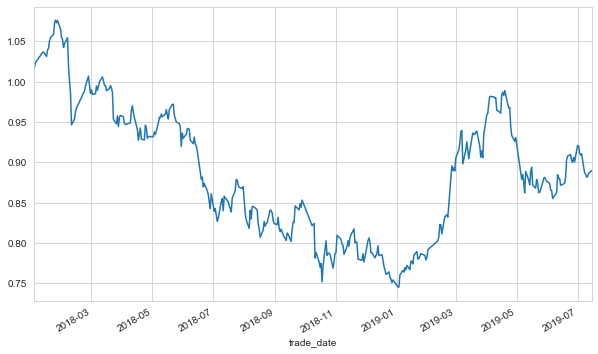

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

value = (index_sh.pct_chg / 100 + 1).cumprod()
value.plot(figsize=(10, 6))

In [14]:
MDD = (value.cummax() - value).max()
print('最大回撤：', MDD)

mdd = ((value.cummax() - value) / value.cummax()).max()
print('最大回撤率：', mdd)

最大回撤： 0.33112857685403274
最大回撤率： 0.3076582617676344
